In [2]:
import numpy as np 
import pandas as pd
import praw 
import matplotlib.pyplot as plt
import networkx as nx 

In [3]:
#praw and reddit api
user_agent = 'MaterialRecording160'
reddit = praw.Reddit(client_id='vlH31uoAfN_ZjJOxsHXjlA',
                     client_secret='Tvcj9Br6fHw-t6NwhgqNW5MULi0-2w',
                     user_agent=user_agent)

In [10]:
def get_posts(subred_name, n):
    subreddit = reddit.subreddit(subred_name)
    posts_info = [] 
    
    for subm in subreddit.top(limit=n):
        
        subred_info = []
        subred_info.append(subm.id)  
        subred_info.append(str(subm.author)) 
        subred_info.append(subm.score)  
        subred_info.append(subm.upvote_ratio)
        subred_info.append(subm.num_comments)
        subred_info.append(subm.subreddit)
        posts_info.append(subred_info)
    
    sorted_info = sorted(posts_info, key=lambda x: x[1], reverse = True)
    posts_df = pd.DataFrame(sorted_info, columns = ['id','author', 'score','upvote_ratio' ,'num_comments', 'subreddit'])
    return posts_df

def get_subreddit_top_authors(subreddit, n_posts = 1000, graph = False):
    prog_df = get_posts(subreddit, n_posts)
    freq_authors = prog_df[prog_df.duplicated(['author'], keep = False)]
    freq_authors = freq_authors[freq_authors.author != 'None']
    
    if graph == True:
        plt.figure(figsize=(10, 5))
        ax = test_jpn_df['author'].value_counts().plot(kind='bar',title='Distribution of author/users and their posts')
        ax.set_xlabel("Users")
        ax.set_ylabel("Number of posts")
        plt.show()
    
    return freq_authors

def get_users_post(username, number = 1):
    user = reddit.redditor(username)
    user_comments_info = []
    
    for comment in user.comments.new(limit = number):
        user_comments_info.append(str(comment.id))
        user_comments_info.append(str(username))
        user_comments_info.append(int(comment.score))
        user_comments_info.append(str(comment.subreddit.display_name))
    
    df = pd.DataFrame([(user_comments_info[i], user_comments_info[i+2], user_comments_info[i+1], 
                        user_comments_info[i+3]) for i in range(0, len(user_comments_info), 4)], 
                      columns=['id', 'score', 'user_name', 'subreddit_name'])
    
    return df

def scrap_celebrities(user_name_list):
    df = pd.DataFrame()
    df = df.fillna(0)

    for author in user_name_list:
        temp = get_users_post(author)
        print(temp)
        df = pd.concat([authors_df, temp])
    
    return df

prog_df = get_posts('Minecraft', 1000)
freq_authors = prog_df[prog_df.duplicated(['author'], keep = False)]
freq_authors = freq_authors[freq_authors.author != 'None']
prog_df.head()

,id,author,score,upvote_ratio,num_comments,subreddit
0,hj138b,zuxic,85932,0.94,992,Minecraft
1,tikimc,zsazska,45939,0.96,591,Minecraft
2,ipeog1,ziggykac,47316,0.98,229,Minecraft
3,f4u1xn,zeetou01,48789,0.97,451,Minecraft
4,jkdp8n,yourfreakyneighbourh,124330,0.92,3537,Minecraft


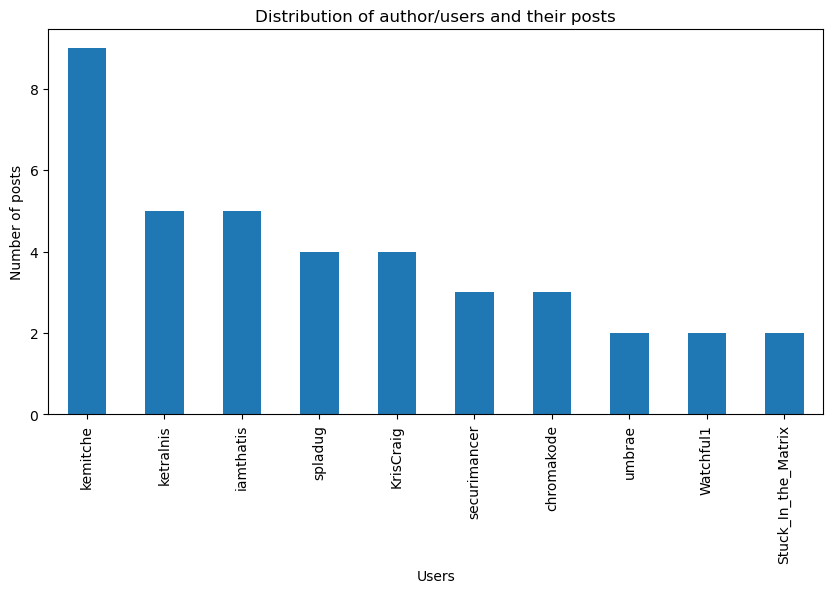

In [324]:
## test
    
test_df = get_subreddit_top_authors('pics', n_posts = 500, graph = True)

In [326]:
authors_lst = list(test_df.author.unique())
authors_lst.remove('zaynthelegend')
print(authors_lst)
scrap_celebrities(authors_lst)

['unknown_human', 'pdmcmahon', 'knownothingwiseguy', 'jigsawmap', 'jcepiano', 'holyfruits', 'gharrity', 'gangbangkang', 'dickfromaccounting', 'Zykium', 'WillOfTheLand', 'Tmfwang', 'SuperCub', 'ReallyRickAstley', 'Pow67', 'Olya_roo', 'Mellanchef', 'JesseD320', 'GallowBoob', 'DaFunkJunkie', 'AlwaysTheNoob', '9999monkeys', '42words']
        id  score      user_name     subreddit_name
0  jhjuhmd      1  unknown_human       reactiongifs
1  jh9vzt2   5366  unknown_human         Unexpected
2  jh56v30    757  unknown_human  therewasanattempt
3  jgvlusc   1757  unknown_human  therewasanattempt
4  jghuwrt      7  unknown_human       reactiongifs
5  jf8ciwt      5  unknown_human  ConanBeingAwesome
6  jf880tv     39  unknown_human  ConanBeingAwesome
7  jf3gx07     36  unknown_human          worldnews
8  jeyhr57    230  unknown_human               pics
9  jewo8f7    332  unknown_human  AnimalsBeingDerps
        id  score  user_name     subreddit_name
0  jfrrtkh      1  pdmcmahon               pics

Forbidden: received 403 HTTP response

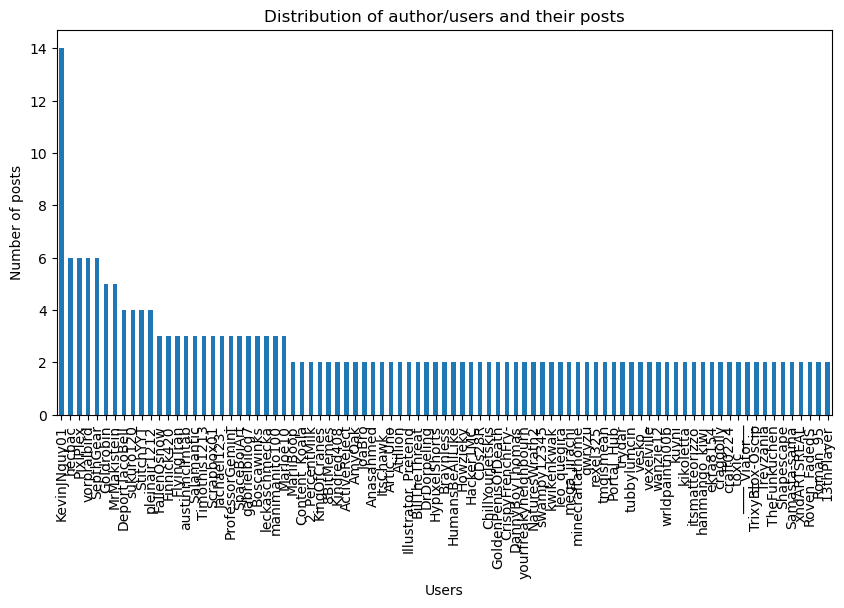

In [11]:
plt.figure(figsize=(10, 5))
ax = freq_authors['author'].value_counts().plot(kind='bar',title='Distribution of author/users and their posts')
ax.set_xlabel("Users")
ax.set_ylabel("Number of posts")
plt.show()

In [249]:
freq_authors = prog_df[prog_df.duplicated(['author'], keep = False)]
freq_authors = freq_authors[freq_authors.author != 'None']
#freq_authors.author.nunique()

authors_lst = list(freq_authors.author.unique())

dataframe = scrap_celebrities(authors_lst)

87


In [244]:
print(dataframe)

         id  score             user_name subreddit_name
0   jff51qu     27  yourfreakyneighbourh        Metroid
1   jfchdgk      9  yourfreakyneighbourh       nintendo
2   jf9i5ps     22  yourfreakyneighbourh        Metroid
3   jf8vjb0    106  yourfreakyneighbourh        Metroid
4   jf8uhco    205  yourfreakyneighbourh        Metroid
..      ...    ...                   ...            ...
5   jhj4k22      1              DJman117          vinyl
6   jhj35q3      2              DJman117          vinyl
7   jhj23gz      2              DJman117          vinyl
8   jhj1imf      2              DJman117          vinyl
9   jhiujpo      1              DJman117          vinyl

[4135 rows x 4 columns]


In [247]:
dataframe['user_name'].nunique()

50

In [251]:
nx_df = dataframe[['user_name', 'subreddit_name']]
g = nx.from_pandas_edgelist(nx_df, source='user_name', target='subreddit_name')

In [262]:
centrality = nx.betweenness_centrality(g)
[(x, centrality[x]) for x in sorted(centrality, key = centrality.get, reverse =True)[:20]]

[('Minecraft', 0.555007637295018),
 ('AskReddit', 0.1064595683253033),
 ('TheFunkuchen', 0.10247704723194138),
 ('tmgismean', 0.09931570379983572),
 ('mega_jirachi', 0.09750238408418041),
 ('vesko_', 0.09499026525026748),
 ('tubbylumcin', 0.09413669186764224),
 ('____toxic____', 0.09092680078985735),
 ('austinmclrntab', 0.0859878259652975),
 ('craggolly', 0.08184333162268237),
 ('sukuro120', 0.07203138643005728),
 ('memes', 0.06583066116967676),
 ('gaming', 0.06388362844316899),
 ('hanmango_kiwi', 0.0633446304680831),
 ('gabrielbilog7', 0.06134553312182818),
 ('interestingasfuck', 0.05783516884777709),
 ('manimanito100', 0.05778009985494328),
 ('itsmatteorizzo', 0.05579675978650619),
 ('yourfreakyneighbourh', 0.05530575539568345),
 ('xndARTSREAL', 0.05132907435488563)]

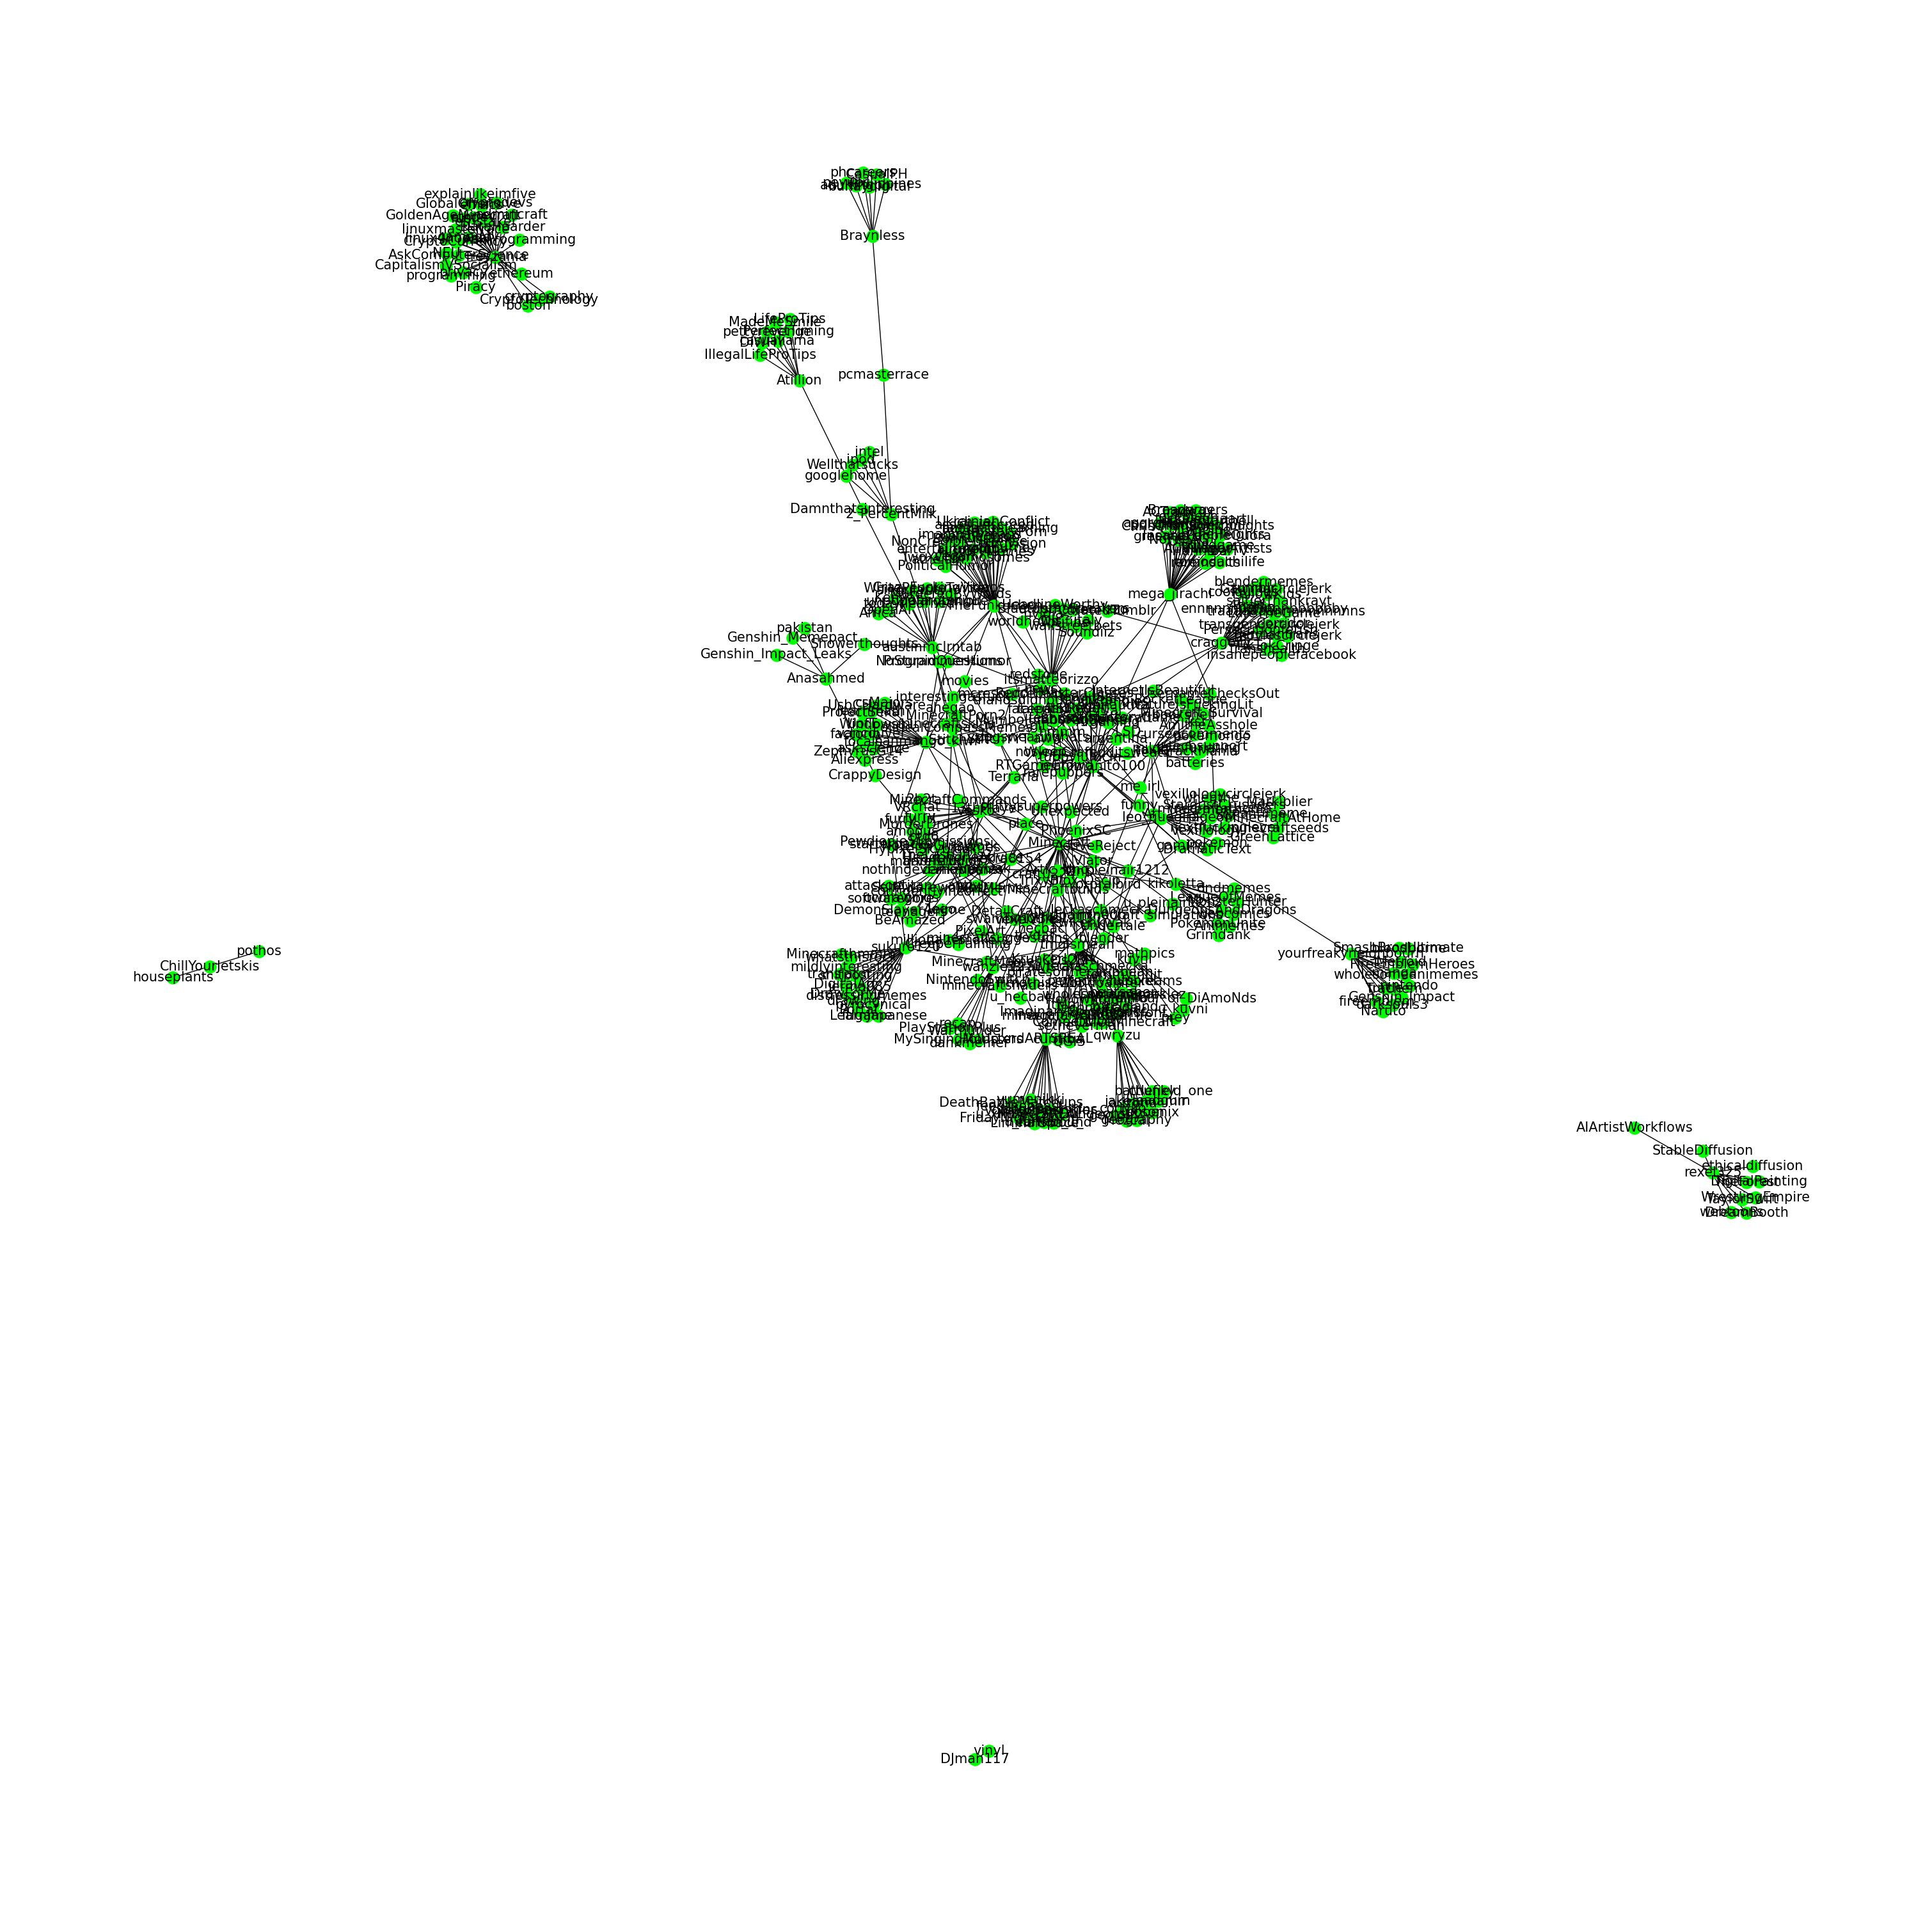

In [295]:
from matplotlib.pyplot import figure

figure(figsize=(30, 30))
layout = nx.spring_layout(g,iterations=50,scale=2)

# Draw all the entities 
nx.draw(g, layout, node_color='lime', node_size=190, with_labels = True, font_size =15)


In [291]:
def graph_distribution_info(G, name):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    davg = np.mean(degree_sequence)
    dvar = np.var(degree_sequence)
    
    print(f'Max Degree of a {name} = {dmax}')
    print(f'Average Degree of a {name} = {davg}')
    print(f'Variance of a Degree destribution = {dvar}')
    
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=33)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=5)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
    ax0.set_title(f"Connected components of {name}")
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")
    
    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

Max Degree of a Subreddits and Celebrities of r/minecraft = 38
Average Degree of a Subreddits and Celebrities of r/minecraft = 2.3014354066985647
Variance of a Degree destribution = 18.1053089443923


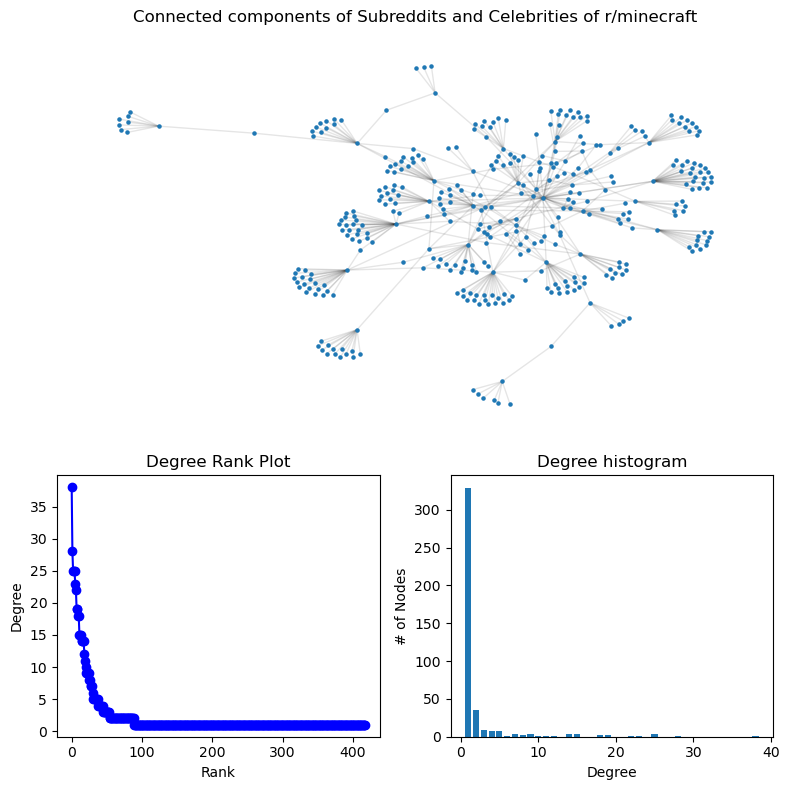

In [292]:
graph_distribution_info(g, 'Subreddits and Celebrities of r/minecraft')